In [1]:
import pandas as pd

folder = './data/'
filename = 'heparin3.xlsx'
df = pd.read_excel(folder+filename)
# df.columns = ['size', 'number', 'concentration', 'volume', 'area']
df.head()

,Depth,Name,Statistic,#Cells
0,NaN,A1 Well_073.fcs,NaN,360096
1,>,A1 Well_073.fcs/Lymphocytes,16.3,58779
2,> >,A1 Well_073.fcs/Lymphocytes/Single Cells,70.3,41320
3,> > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,99.7,41210
4,> > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,99.6,41046


In [2]:
df_mdsc = df.loc[df['Depth']=='> > > > > > > '].copy()
df_mdsc.head()

,Depth,Name,Statistic,#Cells
8,> > > > > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,0.0,0
9,> > > > > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,10.0,3
18,> > > > > > >,A2 Well_074.fcs/Lymphocytes/Single Cells/Singl...,0.0,0
19,> > > > > > >,A2 Well_074.fcs/Lymphocytes/Single Cells/Singl...,8.7,4
28,> > > > > > >,A3 Well_075.fcs/Lymphocytes/Single Cells/Singl...,0.0,0


In [3]:
df_mdsc[['well', 'population']] = df_mdsc['Name'].str.split('.fcs', expand=True)
df_mdsc = df_mdsc.drop(columns=['Name', 'Depth'])

In [4]:
df_mdsc['population'] = df_mdsc['population'].str.split('CD11b/', expand=True)[1]

In [5]:
well_removal = ('C10')
well_removal

'C10'

In [6]:
df_mdsc = df_mdsc.loc[~df_mdsc['well'].str.startswith(well_removal)].copy()

In [7]:
df_mdsc.head()

,Statistic,#Cells,well,population
8,0.0,0,A1 Well_073,gMDSC
9,10.0,3,A1 Well_073,mMDSC
18,0.0,0,A2 Well_074,gMDSC
19,8.7,4,A2 Well_074,mMDSC
28,0.0,0,A3 Well_075,gMDSC


In [8]:
pb_wells = []
for char in ('A', 'B', 'C'):
  for i in range(1, 13):
    if char == 'C' and i > 9:
      break
    pb_wells.append(f'{char}{i}')
pb_wells = tuple(pb_wells)

thymus_wells = []
for char in ('E', 'F'):
  for i in range(1, 13):
    thymus_wells.append(f'{char}{i}')
thymus_wells = tuple(thymus_wells)

In [9]:
df_mdsc['organ'] = ''
df_mdsc.loc[df_mdsc['well'].str.startswith(pb_wells), 'organ'] = 'blood'
df_mdsc.loc[df_mdsc['well'].str.startswith(thymus_wells), 'organ'] = 'thymus'

In [10]:
control_wells = []
for c in ('A', 'B', 'C', 'E', 'F'):
  for i in range(1,3):
    control_wells.append(f'{c}{i}')
control_wells = tuple(control_wells)

sham_sham_wells = (tuple(f'A{i}' for i in range(3,8)) + 
                   tuple(f'E{i}' for i in range(6,13)))
sham_hep_wells = (tuple(f'C{i}' for i in range(7,10)) + 
                   tuple(f'E{i}' for i in range(3,6)))

gl261_sham_wells = tuple(f'A{i}' for i in range(8,13))
gl261_hep_wells = tuple(f'B{i}' for i in range(3,7))

sb28_sham_wells = (tuple(f'B{i}' for i in range(7,13)) + 
                   tuple(f'F{i}' for i in range(7,13)))
sb28_hep_wells = (tuple(f'C{i}' for i in range(3,7)) + 
                   tuple(f'F{i}' for i in range(3,7)))

In [11]:
df_mdsc['group'] = ''
df_mdsc.loc[df_mdsc['well'].str.startswith(control_wells), 'group'] = 'control'
df_mdsc.loc[df_mdsc['well'].str.startswith(sham_sham_wells), 'group'] = 'sham+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(sham_hep_wells), 'group'] = 'sham+hep'
df_mdsc.loc[df_mdsc['well'].str.startswith(gl261_sham_wells), 'group'] = 'GL261+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(gl261_hep_wells), 'group'] = 'GL261+hep'
df_mdsc.loc[df_mdsc['well'].str.startswith(sb28_sham_wells), 'group'] = 'SB28+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(sb28_hep_wells), 'group'] = 'SB28+hep'

In [12]:
df_mdsc.loc[(df_mdsc['group'] == 'sham+sham') & 
            (df_mdsc['organ'] == 'thymus') & 
            (df_mdsc['population'] == 'mMDSC')]

,Statistic,#Cells,well,population,organ,group
379,9.28,86,E6 Well_112,mMDSC,thymus,sham+sham
389,3.99,68,E7 Well_113,mMDSC,thymus,sham+sham
399,4.77,140,E8 Well_114,mMDSC,thymus,sham+sham
409,3.31,144,E9 Well_115,mMDSC,thymus,sham+sham
419,2.40,64,E10 Well_116,mMDSC,thymus,sham+sham
429,3.34,147,E11 Well_117,mMDSC,thymus,sham+sham
439,2.46,59,E12 Well_118,mMDSC,thymus,sham+sham


In [13]:
stats = df_mdsc.groupby(['group', 'organ', 'population']).describe()
stats['Statistic'].head()

count   mean       std  min  25%   50%    75%  \
group      organ population                                                  
GL261+hep  blood gMDSC         4.0  0.000  0.000000  0.0  0.0  0.00  0.000   
                 mMDSC         4.0  1.495  1.744735  0.0  0.0  1.34  2.835   
GL261+sham blood gMDSC         5.0  0.000  0.000000  0.0  0.0  0.00  0.000   
                 mMDSC         5.0  3.348  2.037957  0.0  3.2  3.61  4.760   
SB28+hep   blood gMDSC         2.0  0.000  0.000000  0.0  0.0  0.00  0.000   

                              max  
group      organ population        
GL261+hep  blood gMDSC       0.00  
                 mMDSC       3.30  
GL261+sham blood gMDSC       0.00  
                 mMDSC       5.17  
SB28+hep   blood gMDSC       0.00

In [14]:
mean_stats = stats['Statistic'].loc[:, ['mean']]
mean_stats.head()

mean
group      organ population       
GL261+hep  blood gMDSC       0.000
                 mMDSC       1.495
GL261+sham blood gMDSC       0.000
                 mMDSC       3.348
SB28+hep   blood gMDSC       0.000

In [15]:
groups = set([r[0] for r in mean_stats.index])
groups.discard('control')
groups = list(groups)
groups

['GL261+hep', 'SB28+sham', 'sham+sham', 'GL261+sham', 'SB28+hep', 'sham+hep']

In [16]:
sort_map = {
  'sham+sham': 0,
  'sham+hep': 1,
  'GL261+sham': 2,
  'GL261+hep': 3,
  'SB28+sham': 4,
  'SB28+hep': 5,
}

In [17]:
out = mean_stats.loc[groups]
out = out.sort_index(level='group', key=lambda x: x.map(sort_map))
out.head()

mean
group     organ  population          
sham+sham blood  gMDSC       0.000000
                 mMDSC       7.702000
          thymus gMDSC       0.024429
                 mMDSC       4.221429
sham+hep  blood  gMDSC       0.000000

In [18]:
from scipy.stats import ttest_ind

out['p-value'] = ''
out['95% CI'] = ''

comparison_groups = (
  ('sham+sham', 'GL261+sham'),
  ('sham+sham', 'SB28+sham'),
  ('sham+hep', 'GL261+hep'),
  ('sham+hep', 'SB28+hep'),
)

organs = (
  'blood',
  'thymus',
)

populations = (
  'gMDSC',
  'mMDSC',
)

for subgroup in comparison_groups:
  for organ in organs:
    for pop in populations:
      vector_filter = (df_mdsc['organ'] == organ) & (df_mdsc['population'] == pop)
      res = ttest_ind(
        df_mdsc.loc[vector_filter & (df_mdsc['group'] == subgroup[0]), 'Statistic'],
        df_mdsc.loc[vector_filter & (df_mdsc['group'] == subgroup[1]), 'Statistic'],
      )
      ci = res.confidence_interval()
      out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
      out.at[(subgroup[1], organ, pop), '95% CI'] = f"[{ci.low:.2f}, {ci.high:.2f}]"

out

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_51044/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_51044/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_51044/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_51044/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{

mean p-value         95% CI
group      organ  population                                 
sham+sham  blood  gMDSC       0.000000                       
                  mMDSC       7.702000                       
           thymus gMDSC       0.024429                       
                  mMDSC       4.221429                       
sham+hep   blood  gMDSC       0.000000                       
                  mMDSC       4.233333                       
           thymus gMDSC       0.054000                       
                  mMDSC       3.070000                       
GL261+sham blood  gMDSC       0.000000     nan   [0.00, 0.00]
                  mMDSC       3.348000  0.00**   [1.92, 6.78]
GL261+hep  blood  gMDSC       0.000000     nan   [0.00, 0.00]
                  mMDSC       1.495000    0.12  [-1.04, 6.52]
SB28+sham  blood  gMDSC       0.046667    0.39  [-0.16, 0.07]
                  mMDSC       2.790000  0.00**   [2.95, 6.88]
           thymus gMDSC       0.071500    0.29  [-0.14, 0.05]
                  mMDSC       4.738333    0.63  [-2.83, 1.80]
SB28+hep   blood  gMDSC       0.000000     nan   [0.00, 0.00]
                  mMDSC       1.695000    0.30  [-3.99, 9.07]
           thymus gMDSC       0.011000    0.22  [-0.04, 0.12]
                  mMDSC       4.187500    0.47  [-4.83, 2.60]
GL261+sham thymus gMDSC            NaN     nan     [nan, nan]
                  mMDSC            NaN     nan     [nan, nan]
GL261+hep  thymus gMDSC            NaN     nan     [nan, nan]
                  mMDSC            NaN     nan     [nan, nan]

In [19]:
out_reset = out.reset_index()
display(out_reset.loc[(out_reset['organ'] == 'blood') 
                      & (out_reset['population'] == 'mMDSC')]
                  .set_index(['group', 'organ', 'population']))

display(out_reset.loc[(out_reset['organ'] == 'thymus') 
                      & (out_reset['population'] == 'mMDSC')]
                  .set_index(['group', 'organ', 'population']).dropna())


,,,mean,p-value,95% CI
group,organ,population,,,
sham+sham,blood,mMDSC,7.702000,,
sham+hep,blood,mMDSC,4.233333,,
GL261+sham,blood,mMDSC,3.348000,0.00**,"[1.92, 6.78]"
GL261+hep,blood,mMDSC,1.495000,0.12,"[-1.04, 6.52]"
SB28+sham,blood,mMDSC,2.790000,0.00**,"[2.95, 6.88]"
SB28+hep,blood,mMDSC,1.695000,0.30,"[-3.99, 9.07]"


,,,mean,p-value,95% CI
group,organ,population,,,
sham+sham,thymus,mMDSC,4.221429,,
sham+hep,thymus,mMDSC,3.070000,,
SB28+sham,thymus,mMDSC,4.738333,0.63,"[-2.83, 1.80]"
SB28+hep,thymus,mMDSC,4.187500,0.47,"[-4.83, 2.60]"


In [20]:
df_mdsc.head()

,Statistic,#Cells,well,population,organ,group
8,0.0,0,A1 Well_073,gMDSC,blood,control
9,10.0,3,A1 Well_073,mMDSC,blood,control
18,0.0,0,A2 Well_074,gMDSC,blood,control
19,8.7,4,A2 Well_074,mMDSC,blood,control
28,0.0,0,A3 Well_075,gMDSC,blood,sham+sham


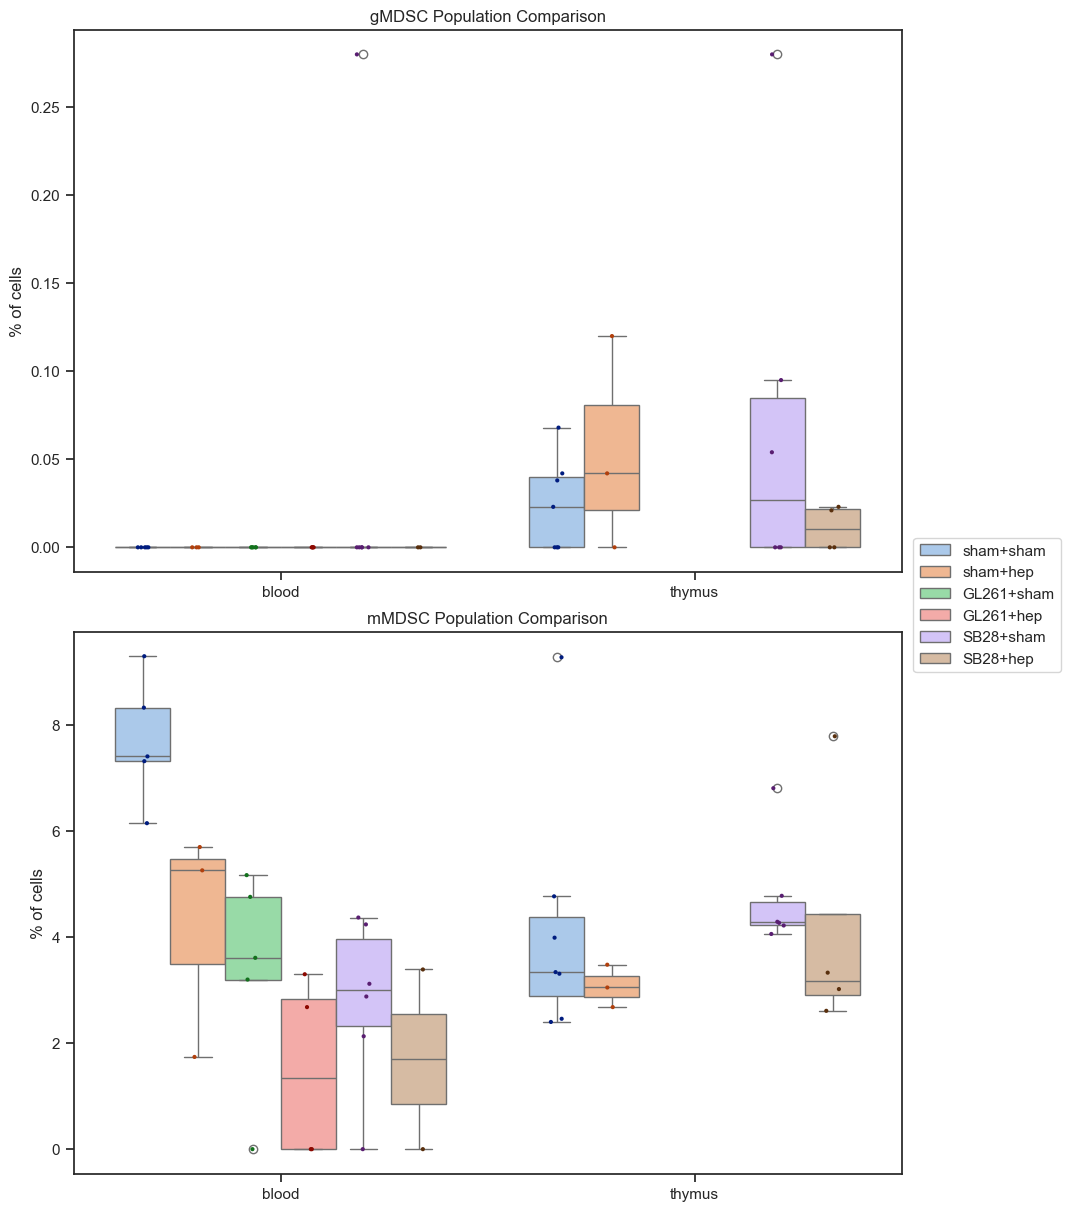

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")
# sns.set_theme(style="ticks", palette="Set1")

fig, axs = plt.subplots(2, 1, figsize=(9, 12), layout='constrained')

for i, pop in enumerate(('gMDSC', 'mMDSC')):
  data = df_mdsc.loc[
      (df_mdsc['group'] != 'control') & (df_mdsc['population'] == pop)
    ]
  data = data.sort_values('group', key=lambda x: x.map(sort_map))
  g = sns.boxplot(
    data,
    x="organ", y="Statistic",
    hue="group",
    ax=axs[i],
  )

  sns.stripplot(
    data,
    x="organ", y="Statistic",
    hue="group", palette='dark',
    size=3, dodge=True,
    ax=axs[i],
    legend=False
  )
  g.set_title(f'{pop} Population Comparison')
  g.set_ylabel('% of cells')
  g.set_xlabel('')
  axs[i].legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()

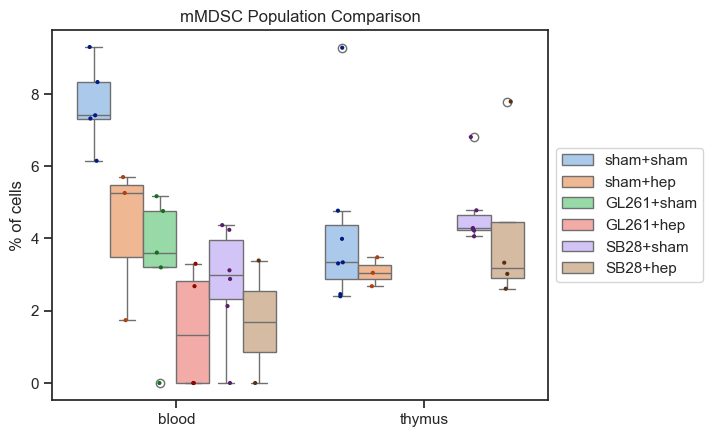

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

data = df_mdsc.loc[
    (df_mdsc['group'] != 'control') & (df_mdsc['population'] == 'mMDSC')
  ]
data = data.sort_values('group', key=lambda x: x.map(sort_map))
g = sns.boxplot(
  data,
  x="organ", y="Statistic",
  hue="group",
)

sns.stripplot(
  data,
  x="organ", y="Statistic",
  hue="group", palette='dark',
  size=3, dodge=True,
  legend=False
)
g.set_title(f'{pop} Population Comparison')
g.set_ylabel('% of cells')
g.set_xlabel('')

handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()

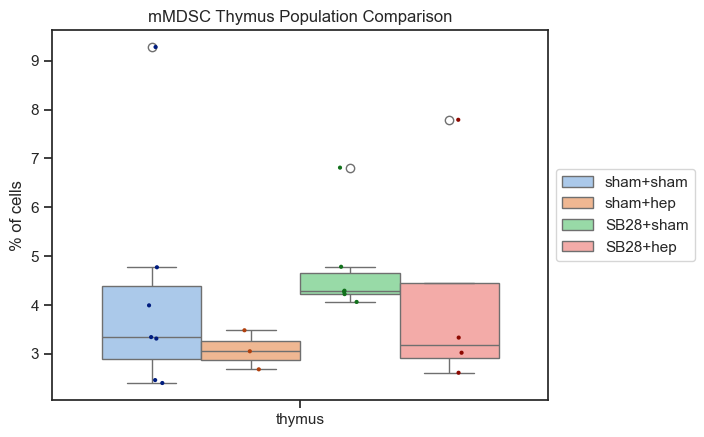

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

data = df_mdsc.loc[
    (df_mdsc['group'] != 'control') & (df_mdsc['population'] == 'mMDSC') & (df_mdsc['organ'] == 'thymus')
  ]
data = data.sort_values('group', key=lambda x: x.map(sort_map))
g = sns.boxplot(
  data,
  x="organ", y="Statistic",
  hue="group",
)
sns.stripplot(
  data,
  x="organ", y="Statistic",
  hue="group", palette='dark',
  size=3, dodge=True,
  legend=False
)

g.set_title('mMDSC Thymus Population Comparison')
g.set_ylabel('% of cells')
g.set_xlabel('')

handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()